# Coursera Capstone Project 

## To upgrade or not to Third Wave Coffee? 

### This Project aims to help existing coffee shop / cafe owners make a decision whether it's worth upgrading to third wave coffee or not.

### Contents

* [Preparing the Training Dataset](#section1)
  <a href="#section1"></a> 
* [Extracting details of Venues using FourSquare API](#section2)
  <a href="#section2"></a>   
* [Feature Explanation](#section3)
  <a href="#section3"></a>    
* [Exploratory Data Analysis (EDA)](#section4)
  <a href="#section4"></a>    
* [Data Visualization](#section5)
  <a href="#section5"></a>   
* [Correlation](#section6)
  <a href="#section6"></a>   
* [Model Development](#section7)
  <a href="#section7"></a>   
* [Model Evaluation/Result](#section8)
  <a href="#section8"></a>   

### Let's import all the necessary python libraries needed for this project

In [1]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
import folium
from geopy.geocoders import Nominatim
from pandas.io.json import json_normalize

###  Now, let's print the FourSquare credentials below

In [2]:
CLIENT_ID = '0YJU0135W4T3VSSDJ2M0KLDY24B55V0TJEQHLD44AQ44LPE3' # your Foursquare ID
CLIENT_SECRET = 'G5LJIHHYVH2G5VQXSJY3IAVR0ICEOLEID4LGPYLEBJFGLKSL' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 0YJU0135W4T3VSSDJ2M0KLDY24B55V0TJEQHLD44AQ44LPE3
CLIENT_SECRET:G5LJIHHYVH2G5VQXSJY3IAVR0ICEOLEID4LGPYLEBJFGLKSL


<a id="section1"></a>
### 1. Preparing the Training Dataset

In [3]:
third_wave_coffee=requests.get("https://foodfornet.com/13-spots-third-wave-coffee/").text
soup=BeautifulSoup(third_wave_coffee,"html.parser")

In [4]:
print(soup.prettify)

<bound method Tag.prettify of <!DOCTYPE html>
<html lang="en-US"><head><meta charset="utf-8"/><meta content="If You Can't Stomach Another Crap-puccino, 13 Spots for Third Wave Coffee Spots To Get Fresh Roasted, Artisanally Brewed Coffee &amp; Espresso" name="description"/><meta content="width=device-width, initial-scale=1" name="viewport"/><style media="all">.footable.table,.footable.table *,.footable-details.table,.footable-details.table *{-webkit-box-sizing:border-box;-moz-box-sizing:border-box;box-sizing:border-box}.footable.table th,.footable-details.table th{text-align:left}.footable.table,.footable-details.table{width:100%;max-width:100%;margin-bottom:20px}.footable.table>caption+thead>tr:first-child>th,.footable.table>colgroup+thead>tr:first-child>th,.footable.table>thead:first-child>tr:first-child>th,.footable.table>caption+thead>tr:first-child>td,.footable.table>colgroup+thead>tr:first-child>td,.footable.table>thead:first-child>tr:first-child>td,.footable-details.table>caption

In [5]:
tag=soup.p

In [6]:
tag

<p class="site-title" itemprop="headline"><a href="https://foodfornet.com/">Food For Net</a></p>

In [7]:
dir(soup)

['ASCII_SPACES',
 'DEFAULT_BUILDER_FEATURES',
 'HTML_FORMATTERS',
 'NO_PARSER_SPECIFIED_WARNING',
 'ROOT_TAG_NAME',
 'XML_FORMATTERS',
 '__bool__',
 '__call__',
 '__class__',
 '__contains__',
 '__copy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '__weakref__',
 '_all_strings',
 '_check_markup_is_url',
 '_feed',
 '_find_all',
 '_find_one',
 '_formatter_for_name',
 '_is_xml',
 '_lastRecursiveChild',
 '_last_descendant',
 '_linkage_fixer',
 '_most_recent_element',
 '_namespaces',
 '_popToTag',
 '_should_pretty_print',
 'append',
 'attrs',
 'builder',
 'can_be_empty_element',

In [8]:
thirdcf=soup.find_all("h3")

In [9]:
thirdcf

[<h3>1. Blue Bottle Coffee Company</h3>,
 <h3>2. Counter Culture Coffee</h3>,
 <h3>3. Caffe Vita</h3>,
 <h3>4. Equator Coffees &amp; Teas</h3>,
 <h3>5. Espresso Vivace</h3>,
 <h3>6. Four Barrel Coffee</h3>,
 <h3>7. Heart</h3>,
 <h3>8. Intelligentsia Coffee &amp; Tea</h3>,
 <h3> </h3>,
 <h3>9. La Colombe Coffee Roasters</h3>,
 <h3>10. Ritual Coffee Roasters</h3>,
 <h3>11. Sightglass</h3>,
 <h3>12. Stumptown Coffee</h3>,
 <h3> </h3>,
 <h3>13. Toby's Estate Coffee Roasters</h3>,
 <h3 class="comment-reply-title" id="reply-title">Leave a Reply <small><a href="/13-spots-third-wave-coffee/#respond" id="cancel-comment-reply-link" rel="nofollow" style="display:none;">Cancel reply</a></small></h3>]

In [10]:
list=[]
for i in range(0,len(thirdcf)):
    list.append(thirdcf[i].text)
list    

['1. Blue Bottle Coffee Company',
 '2. Counter Culture Coffee',
 '3. Caffe Vita',
 '4. Equator Coffees & Teas',
 '5. Espresso Vivace',
 '6. Four Barrel Coffee',
 '7. Heart',
 '8. Intelligentsia Coffee & Tea',
 '\xa0',
 '9. La Colombe Coffee Roasters',
 '10. Ritual\xa0Coffee Roasters',
 '11. Sightglass',
 '12. Stumptown Coffee',
 '\xa0',
 "13. Toby's Estate Coffee Roasters",
 'Leave a Reply Cancel reply']

In [11]:
list.remove('\xa0')

In [12]:
list.remove('Leave a Reply Cancel reply')

In [13]:
list

['1. Blue Bottle Coffee Company',
 '2. Counter Culture Coffee',
 '3. Caffe Vita',
 '4. Equator Coffees & Teas',
 '5. Espresso Vivace',
 '6. Four Barrel Coffee',
 '7. Heart',
 '8. Intelligentsia Coffee & Tea',
 '9. La Colombe Coffee Roasters',
 '10. Ritual\xa0Coffee Roasters',
 '11. Sightglass',
 '12. Stumptown Coffee',
 '\xa0',
 "13. Toby's Estate Coffee Roasters"]

In [14]:
list.remove('\xa0')

In [15]:
list

['1. Blue Bottle Coffee Company',
 '2. Counter Culture Coffee',
 '3. Caffe Vita',
 '4. Equator Coffees & Teas',
 '5. Espresso Vivace',
 '6. Four Barrel Coffee',
 '7. Heart',
 '8. Intelligentsia Coffee & Tea',
 '9. La Colombe Coffee Roasters',
 '10. Ritual\xa0Coffee Roasters',
 '11. Sightglass',
 '12. Stumptown Coffee',
 "13. Toby's Estate Coffee Roasters"]

In [16]:
new_list=[]
for i in range(0,len(list)):
      new_list.append(list[i].split(".")[1])
new_list    

[' Blue Bottle Coffee Company',
 ' Counter Culture Coffee',
 ' Caffe Vita',
 ' Equator Coffees & Teas',
 ' Espresso Vivace',
 ' Four Barrel Coffee',
 ' Heart',
 ' Intelligentsia Coffee & Tea',
 ' La Colombe Coffee Roasters',
 ' Ritual\xa0Coffee Roasters',
 ' Sightglass',
 ' Stumptown Coffee',
 " Toby's Estate Coffee Roasters"]

### &nbsp; We will now add venues which serve third wave coffee to training set

In [17]:
Upgrad=["Yes","Yes","Yes","Yes","Yes","Yes","Yes","Yes","Yes","Yes","Yes","Yes","Yes"]
training_set=pd.DataFrame(data={"Venue Name":new_list,"Upgrade":Upgrad})
training_set

,Venue Name,Upgrade
0,Blue Bottle Coffee Company,Yes
1,Counter Culture Coffee,Yes
2,Caffe Vita,Yes
3,Equator Coffees & Teas,Yes
4,Espresso Vivace,Yes
5,Four Barrel Coffee,Yes
6,Heart,Yes
7,Intelligentsia Coffee & Tea,Yes
8,La Colombe Coffee Roasters,Yes
9,Ritual Coffee Roasters,Yes


### &nbsp; We will now add venues which don't serve third wave coffee to training set

In [18]:
coffee=requests.get("https://www.yelp.com/search?find_desc=coffee%20shops&find_loc=Napa%2C%20CA&cflt=coffee&sortby=rating").text
soup=BeautifulSoup(coffee,"html.parser")
print(soup.prettify)

<bound method Tag.prettify of <!DOCTYPE HTML>

<!--[if lt IE 7 ]> <html xmlns:fb="http://www.facebook.com/2008/fbml" class="ie6 ie ltie9 ltie8 no-js" lang="en"> <![endif]-->
<!--[if IE 7 ]>    <html xmlns:fb="http://www.facebook.com/2008/fbml" class="ie7 ie ltie9 ltie8 no-js" lang="en"> <![endif]-->
<!--[if IE 8 ]>    <html xmlns:fb="http://www.facebook.com/2008/fbml" class="ie8 ie ltie9 no-js" lang="en"> <![endif]-->
<!--[if IE 9 ]>    <html xmlns:fb="http://www.facebook.com/2008/fbml" class="ie9 ie no-js" lang="en"> <![endif]-->
<!--[if (gt IE 9)|!(IE)]><!--> <html class="no-js" lang="en" xmlns:fb="http://www.facebook.com/2008/fbml"> <!--<![endif]-->
<head>
<script>
            (function() {
                var main = null;

                var main=function(){window.onerror=function(k,a,c,i,f){var j=(document.getElementsByTagName("html")[0].getAttribute("webdriver")==="true"||navigator.userAgent==="selenium");var h=f&&(f.name==="ServerSideRenderingError"||f.name==="CSRFallbackError"

In [19]:
cf=soup.find_all(lambda tag: tag.name == 'a' and tag.get('name'),limit=15)

In [20]:
cf

[<a class="lemon--a__373c0__IEZFH link__373c0__1G70M link-color--inherit__373c0__3dzpk link-size--inherit__373c0__1VFlE" href="/adredir?ad_business_id=6cyggIovYqGar9lR9H3upg&amp;campaign_id=QO0wgofYS23ZFIfqrK4Zfg&amp;click_origin=search_results&amp;placement=above_search&amp;redirect_url=https%3A%2F%2Fwww.yelp.com%2Fbiz%2Ft4-tea-for-u-fairfield&amp;request_id=f039be16d253ab56&amp;signature=6d782aba5832c1c1bab9d2a0377a9942605dd003a8e647408bf1e35fcdaf8904&amp;slot=0" name="T4 Tea For U" rel="" target="">T4 Tea For U</a>,
 <a class="lemon--a__373c0__IEZFH link__373c0__1G70M link-color--inherit__373c0__3dzpk link-size--inherit__373c0__1VFlE" href="/biz/southside-cafe-napa?osq=coffee+shops" name="Southside Cafe" rel="" target="">Southside Cafe</a>,
 <a class="lemon--a__373c0__IEZFH link__373c0__1G70M link-color--inherit__373c0__3dzpk link-size--inherit__373c0__1VFlE" href="/biz/brewed-napa?osq=coffee+shops" name="brewed." rel="" target="">brewed.</a>,
 <a class="lemon--a__373c0__IEZFH link_

In [21]:
list2=[]
for i in range(0,len(cf)):
    list2.append(cf[i].text)
list2   

['T4 Tea For U',
 'Southside Cafe',
 'brewed.',
 'Dutch Bros Coffee',
 'Monday Bakery',
 'Napastäk Napa Valley',
 'Contimo Provisions',
 'Ritual Coffee Roasters',
 'Happy’s Donut Tree',
 'Southside Cafe',
 'Peet’s Coffee',
 'Blend',
 'Java Hut',
 'Golden Bagel Cafe',
 'Browns Valley Yogurt & Espresso Bar']

In [22]:
list2.pop(0)

'T4 Tea For U'

In [23]:
list2.pop(6)

'Ritual Coffee Roasters'

In [24]:
list2

['Southside Cafe',
 'brewed.',
 'Dutch Bros Coffee',
 'Monday Bakery',
 'Napastäk Napa Valley',
 'Contimo Provisions',
 'Happy’s Donut Tree',
 'Southside Cafe',
 'Peet’s Coffee',
 'Blend',
 'Java Hut',
 'Golden Bagel Cafe',
 'Browns Valley Yogurt & Espresso Bar']

In [25]:
list2.remove('Blend')

In [26]:
len(list2)

12

In [27]:
Nograd=["No","No","No","No","No","No","No","No","No","No","No","No"]
training_set2=pd.DataFrame(data={"Venue Name":list2,"Upgrade":Nograd})
training_set2

,Venue Name,Upgrade
0,Southside Cafe,No
1,brewed.,No
2,Dutch Bros Coffee,No
3,Monday Bakery,No
4,Napastäk Napa Valley,No
5,Contimo Provisions,No
6,Happy’s Donut Tree,No
7,Southside Cafe,No
8,Peet’s Coffee,No
9,Java Hut,No


In [28]:
training_set=training_set.append(training_set2)

In [29]:
training_set

,Venue Name,Upgrade
0,Blue Bottle Coffee Company,Yes
1,Counter Culture Coffee,Yes
2,Caffe Vita,Yes
3,Equator Coffees & Teas,Yes
4,Espresso Vivace,Yes
5,Four Barrel Coffee,Yes
6,Heart,Yes
7,Intelligentsia Coffee & Tea,Yes
8,La Colombe Coffee Roasters,Yes
9,Ritual Coffee Roasters,Yes


In [30]:
training_set=training_set.reset_index(drop=True)
training_set

,Venue Name,Upgrade
0,Blue Bottle Coffee Company,Yes
1,Counter Culture Coffee,Yes
2,Caffe Vita,Yes
3,Equator Coffees & Teas,Yes
4,Espresso Vivace,Yes
5,Four Barrel Coffee,Yes
6,Heart,Yes
7,Intelligentsia Coffee & Tea,Yes
8,La Colombe Coffee Roasters,Yes
9,Ritual Coffee Roasters,Yes


In [31]:
ll=pd.DataFrame(columns={"Longitude","Latitude"})
ll=ll.reindex(columns=["Latitude","Longitude"])
ll 
len(ll)

0

In [32]:
def add_lalo(table):
    ban=Nominatim(user_agent="foursquare_agent")
    lon=[]
    lat=[] 
    add=[]
    for la in range(0,len(table)):
        loc=ban.geocode(table.loc[la,"Venue Name"],timeout=10000)
        if(loc == None):
            lat.append("None")
        else:    
            lat.append(loc.latitude)
    for lo in range(0,len(table)):
        loc=ban.geocode(table.loc[lo,"Venue Name"],timeout=10000)
        if(loc ==None):
            lon.append("None")
        else:  
            lon.append(loc.longitude)
    for lo in range(0,len(table)):
        loc=ban.geocode(table.loc[lo,"Venue Name"],timeout=10000)
        if(loc ==None):
            add.append("None")
        else:  
            add.append(loc)       
    ll=pd.DataFrame(data={"Latitude":lat,"Longitude":lon,"Address":add})
    table=table.join(ll)
    return(table)

In [33]:
ban=Nominatim(user_agent="foursquare_agent")
loc=ban.geocode(training_set.loc[3,"Venue Name"],timeout=10000)
print(loc)
if loc is None:
    print("a")
else:    
    print("b")

Equator Coffees & Teas, Bay Place, Financial District, Oakland, Alameda County, California, 94612, United States of America
b


In [34]:
training_set=add_lalo(training_set)

In [35]:
training_set.head()

,Venue Name,Upgrade,Latitude,Longitude,Address
0,Blue Bottle Coffee Company,Yes,None,None,None
1,Counter Culture Coffee,Yes,37.8448,-122.29,"(Counter Culture Coffee, 1349, 64th Street, Em..."
2,Caffe Vita,Yes,40.7198,-73.9884,"(Caffè Vita, 124, Ludlow Street, Lower East Si..."
3,Equator Coffees & Teas,Yes,37.8121,-122.261,"(Equator Coffees & Teas, Bay Place, Financial ..."
4,Espresso Vivace,Yes,47.6216,-122.321,"(Espresso Vivace - Sidewalk Bar, 321, Broadway..."


In [36]:
training_set=training_set.drop([0,6,7,12,18,22])
training_set=training_set.reset_index(drop=True)
training_set.head()

,Venue Name,Upgrade,Latitude,Longitude,Address
0,Counter Culture Coffee,Yes,37.8448,-122.29,"(Counter Culture Coffee, 1349, 64th Street, Em..."
1,Caffe Vita,Yes,40.7198,-73.9884,"(Caffè Vita, 124, Ludlow Street, Lower East Si..."
2,Equator Coffees & Teas,Yes,37.8121,-122.261,"(Equator Coffees & Teas, Bay Place, Financial ..."
3,Espresso Vivace,Yes,47.6216,-122.321,"(Espresso Vivace - Sidewalk Bar, 321, Broadway..."
4,Four Barrel Coffee,Yes,37.729,-122.404,"(Four Barrel Coffee, 2, Burrows Street, Portol..."


In [37]:
training_set=training_set.drop([7,12,17])
training_set=training_set.reset_index(drop=True)
training_set.shape

(16, 5)

In [38]:
training_set.iloc[9,0]="Brewed"

In [39]:
training_set.iloc[9,0]

'Brewed'

<a id="section2"></a>
### Extracting details of the venues using FourSquare API,

In [40]:
import json 
import requests
def get_ids(name,lat,long):
        url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit{}'.format(CLIENT_ID,CLIENT_SECRET,VERSION,lat,long,500,1)
        resp = requests.get(url=url)
        data = json.loads(resp.text)
        venue = data['response']['venues']
        ven_id=json_normalize(venue)
    #tranform venues into a dataframe)
        for f in range(0,len(ven_id)):
            
            if ven_id.iloc[f,1].startswith(name[0:4].strip()) is True:
                return(ven_id.iloc[f,0])
            else:
                continue;
        return("NaN")

In [41]:
get_ids(training_set.iloc[5,0],training_set.iloc[5,2],training_set.iloc[5,3])


'NaN'

In [42]:
ids=[]
for i in range(0,len(training_set)):
    ids.append(get_ids(training_set.iloc[i,0],training_set.iloc[i,2],training_set.iloc[i,3]))
ids   

['54d00291498e90467fd7a7b4',
 '4f22b060e4b02a95fc886761',
 '59f4a4825ba0466a8a09d7cb',
 '44e49b62f964a52061371fe3',
 '5169af8d498e44df71319f6b',
 'NaN',
 '42853f80f964a5200c231fe3',
 '4a7b455ef964a52089ea1fe3',
 '574214ee498ef558ce9d8513',
 '4fb80fd9e4b0df0c04f130c2',
 '5bf42f46c97f28002c412e6f',
 '55b15ca7498e9b7913770dc4',
 '4b684decf964a520b9702be3',
 '574214ee498ef558ce9d8513',
 '4a91a6aaf964a520291b20e3',
 '4b52333ff964a520646f27e3']

In [43]:
idtable=pd.DataFrame(data={"Venue ID":ids})
training_set=training_set.join(idtable)

In [44]:

training_set.head(10)

,Venue Name,Upgrade,Latitude,Longitude,Address,Venue ID
0,Counter Culture Coffee,Yes,37.8448,-122.29,"(Counter Culture Coffee, 1349, 64th Street, Em...",54d00291498e90467fd7a7b4
1,Caffe Vita,Yes,40.7198,-73.9884,"(Caffè Vita, 124, Ludlow Street, Lower East Si...",4f22b060e4b02a95fc886761
2,Equator Coffees & Teas,Yes,37.8121,-122.261,"(Equator Coffees & Teas, Bay Place, Financial ...",59f4a4825ba0466a8a09d7cb
3,Espresso Vivace,Yes,47.6216,-122.321,"(Espresso Vivace - Sidewalk Bar, 321, Broadway...",44e49b62f964a52061371fe3
4,Four Barrel Coffee,Yes,37.729,-122.404,"(Four Barrel Coffee, 2, Burrows Street, Portol...",5169af8d498e44df71319f6b
5,La Colombe Coffee Roasters,Yes,41.9246,-87.6989,"(La Colombe Coffee Roasters, 2839, West Fuller...",NaN
6,Ritual Coffee Roasters,Yes,37.7564,-122.421,"(Ritual Coffee Roasters, 1026, Valencia Street...",42853f80f964a5200c231fe3
7,Stumptown Coffee,Yes,47.612,-122.317,"(Stumptown Coffee, 1115, 12th Avenue, Central ...",4a7b455ef964a52089ea1fe3
8,Southside Cafe,No,38.288,-122.31,"(Southside Cafe, Foothill Boulevard, Imola, Na...",574214ee498ef558ce9d8513
9,Brewed,No,32.7305,-97.3327,"(Brewed, 801, West Magnolia Avenue, Fort Worth...",4fb80fd9e4b0df0c04f130c2


In [45]:
training_set=training_set.drop(5)
training_set=training_set.reset_index(drop=True)
training_set.head(7)

,Venue Name,Upgrade,Latitude,Longitude,Address,Venue ID
0,Counter Culture Coffee,Yes,37.8448,-122.29,"(Counter Culture Coffee, 1349, 64th Street, Em...",54d00291498e90467fd7a7b4
1,Caffe Vita,Yes,40.7198,-73.9884,"(Caffè Vita, 124, Ludlow Street, Lower East Si...",4f22b060e4b02a95fc886761
2,Equator Coffees & Teas,Yes,37.8121,-122.261,"(Equator Coffees & Teas, Bay Place, Financial ...",59f4a4825ba0466a8a09d7cb
3,Espresso Vivace,Yes,47.6216,-122.321,"(Espresso Vivace - Sidewalk Bar, 321, Broadway...",44e49b62f964a52061371fe3
4,Four Barrel Coffee,Yes,37.729,-122.404,"(Four Barrel Coffee, 2, Burrows Street, Portol...",5169af8d498e44df71319f6b
5,Ritual Coffee Roasters,Yes,37.7564,-122.421,"(Ritual Coffee Roasters, 1026, Valencia Street...",42853f80f964a5200c231fe3
6,Stumptown Coffee,Yes,47.612,-122.317,"(Stumptown Coffee, 1115, 12th Avenue, Central ...",4a7b455ef964a52089ea1fe3


In [46]:
training_set.shape

(15, 6)

### &nbsp; After getting the venue ids, we will obtain it's likes too

In [47]:
def get_likes(table):
    likes=[]
    for i in range(0,len(table)):
        url1= 'https://api.foursquare.com/v2/venues/{}/likes?client_id={}&client_secret={}&v={}'.format(table.iloc[i,5],CLIENT_ID,CLIENT_SECRET,VERSION)
        resp1 = requests.get(url=url1)
        data1= json.loads(resp1.text)  
        venues1 = data1["response"]["likes"]["count"]
        likes.append(venues1)
    ltable=pd.DataFrame(data={"Likes":likes})      
    table=table.join(ltable)
    return(table)      

In [48]:
training_set=get_likes(training_set)

In [49]:
training_set.head()

,Venue Name,Upgrade,Latitude,Longitude,Address,Venue ID,Likes
0,Counter Culture Coffee,Yes,37.8448,-122.29,"(Counter Culture Coffee, 1349, 64th Street, Em...",54d00291498e90467fd7a7b4,6
1,Caffe Vita,Yes,40.7198,-73.9884,"(Caffè Vita, 124, Ludlow Street, Lower East Si...",4f22b060e4b02a95fc886761,317
2,Equator Coffees & Teas,Yes,37.8121,-122.261,"(Equator Coffees & Teas, Bay Place, Financial ...",59f4a4825ba0466a8a09d7cb,16
3,Espresso Vivace,Yes,47.6216,-122.321,"(Espresso Vivace - Sidewalk Bar, 321, Broadway...",44e49b62f964a52061371fe3,183
4,Four Barrel Coffee,Yes,37.729,-122.404,"(Four Barrel Coffee, 2, Burrows Street, Portol...",5169af8d498e44df71319f6b,107


In [50]:
training_set.tail()

,Venue Name,Upgrade,Latitude,Longitude,Address,Venue ID,Likes
10,Napastäk Napa Valley,No,38.2982,-122.288,"(Napastäk, 1240, 1st Street, Napa Abajo, Napa,...",55b15ca7498e9b7913770dc4,1
11,Happy’s Donut Tree,No,38.2811,-122.293,"(Happy's Donut Tree, South Jefferson Street, I...",4b684decf964a520b9702be3,3
12,Southside Cafe,No,38.288,-122.31,"(Southside Cafe, Foothill Boulevard, Imola, Na...",574214ee498ef558ce9d8513,49
13,Peet’s Coffee,No,45.5205,-122.679,"(Peet's Coffee, 508, Southwest Broadway, Portl...",4a91a6aaf964a520291b20e3,46
14,Browns Valley Yogurt & Espresso Bar,No,38.3044,-122.329,"(Browns Valley Yogurt & Espresso Bar, Browns V...",4b52333ff964a520646f27e3,3


In [51]:
training_set.head(2)

,Venue Name,Upgrade,Latitude,Longitude,Address,Venue ID,Likes
0,Counter Culture Coffee,Yes,37.8448,-122.29,"(Counter Culture Coffee, 1349, 64th Street, Em...",54d00291498e90467fd7a7b4,6
1,Caffe Vita,Yes,40.7198,-73.9884,"(Caffè Vita, 124, Ludlow Street, Lower East Si...",4f22b060e4b02a95fc886761,317


In [52]:
def top_5(table):
    t1=[]
    t2=[]
    t3=[]
    t4=[]
    t5=[]
    t=[t1,t2,t3,t4,t5]
    for i in range(0,len(table)):
        url1= 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&time={}&day={}&intent={}&lastVenue={}&sortByPopularity={}'.format(CLIENT_ID,CLIENT_SECRET,VERSION,
        table.iloc[i,2],table.iloc[i,3],2500,5,"any","any","nextVenues",table.iloc[i,5],1)
        resp1 = requests.get(url=url1)
        data1= json.loads(resp1.text)
        data1
        for r in range(0,5):
                ven=data1["response"]["groups"][0]["items"][r]["venue"]["categories"][0]["name"]
                t[r].append(ven)
    t5=pd.DataFrame(data={"1st NextVenue":t[0],"2nd NextVenue":t[1],"3rd NextVenue":t[2],"4th NextVenue":t[3],"5th NextVenue":t[4]})           
    table=table.join(t5)
    return(table)

In [53]:
training_set=top_5(training_set)

In [54]:
training_set.head(5)

,Venue Name,Upgrade,Latitude,Longitude,Address,Venue ID,Likes,1st NextVenue,2nd NextVenue,3rd NextVenue,4th NextVenue,5th NextVenue
0,Counter Culture Coffee,Yes,37.8448,-122.29,"(Counter Culture Coffee, 1349, 64th Street, Em...",54d00291498e90467fd7a7b4,6,Shopping Plaza,Grocery Store,Supermarket,Big Box Store,Movie Theater
1,Caffe Vita,Yes,40.7198,-73.9884,"(Caffè Vita, 124, Ludlow Street, Lower East Si...",4f22b060e4b02a95fc886761,317,Park,Bridge,Memorial Site,Park,Park
2,Equator Coffees & Teas,Yes,37.8121,-122.261,"(Equator Coffees & Teas, Bay Place, Financial ...",59f4a4825ba0466a8a09d7cb,16,Plaza,Grocery Store,Grocery Store,Grocery Store,Food & Drink Shop
3,Espresso Vivace,Yes,47.6216,-122.321,"(Espresso Vivace - Sidewalk Bar, 321, Broadway...",44e49b62f964a52061371fe3,183,Market,Plaza,Monument / Landmark,Scenic Lookout,Grocery Store
4,Four Barrel Coffee,Yes,37.729,-122.404,"(Four Barrel Coffee, 2, Burrows Street, Portol...",5169af8d498e44df71319f6b,107,Park,Ice Cream Shop,Park,Park,Park


In [55]:
training_set.drop_duplicates(subset="Venue Name",keep="first",inplace=True)
training_set.shape

(14, 12)

In [56]:
training_set=training_set.reset_index(drop=True)
training_set.shape

(14, 12)

In [57]:
def get_rating(ven_id):
    url1= 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(ven_id,CLIENT_ID,CLIENT_SECRET,VERSION)
    resp1 = requests.get(url=url1)
    data1= json.loads(resp1.text)  
    rating = data1["response"]["venue"]["rating"]
    return(rating)

In [58]:
ratings=[]
for i in range(0,len(training_set)):
    try:
        ratings.append(get_rating(training_set.iloc[i,5]))
    except:
        ratings.append("NaN")

In [59]:
rtable=pd.DataFrame(data={"Rating":ratings})
training_set_r=training_set.join(rtable)
training_set_r.head()

,Venue Name,Upgrade,Latitude,Longitude,Address,Venue ID,Likes,1st NextVenue,2nd NextVenue,3rd NextVenue,4th NextVenue,5th NextVenue,Rating
0,Counter Culture Coffee,Yes,37.8448,-122.29,"(Counter Culture Coffee, 1349, 64th Street, Em...",54d00291498e90467fd7a7b4,6,Shopping Plaza,Grocery Store,Supermarket,Big Box Store,Movie Theater,NaN
1,Caffe Vita,Yes,40.7198,-73.9884,"(Caffè Vita, 124, Ludlow Street, Lower East Si...",4f22b060e4b02a95fc886761,317,Park,Bridge,Memorial Site,Park,Park,8.7
2,Equator Coffees & Teas,Yes,37.8121,-122.261,"(Equator Coffees & Teas, Bay Place, Financial ...",59f4a4825ba0466a8a09d7cb,16,Plaza,Grocery Store,Grocery Store,Grocery Store,Food & Drink Shop,9
3,Espresso Vivace,Yes,47.6216,-122.321,"(Espresso Vivace - Sidewalk Bar, 321, Broadway...",44e49b62f964a52061371fe3,183,Market,Plaza,Monument / Landmark,Scenic Lookout,Grocery Store,8.9
4,Four Barrel Coffee,Yes,37.729,-122.404,"(Four Barrel Coffee, 2, Burrows Street, Portol...",5169af8d498e44df71319f6b,107,Park,Ice Cream Shop,Park,Park,Park,8.7


In [60]:
training_set_r.tail()

,Venue Name,Upgrade,Latitude,Longitude,Address,Venue ID,Likes,1st NextVenue,2nd NextVenue,3rd NextVenue,4th NextVenue,5th NextVenue,Rating
9,Dutch Bros Coffee,No,45.5703,-122.546,"(Dutch Bros. Coffee, 11609, Northeast Glenn Wi...",5bf42f46c97f28002c412e6f,1,Warehouse Store,Furniture / Home Store,Shopping Mall,Big Box Store,Hardware Store,7.3
10,Napastäk Napa Valley,No,38.2982,-122.288,"(Napastäk, 1240, 1st Street, Napa Abajo, Napa,...",55b15ca7498e9b7913770dc4,1,Farmers Market,Big Box Store,Supermarket,Burger Joint,Supermarket,NaN
11,Happy’s Donut Tree,No,38.2811,-122.293,"(Happy's Donut Tree, South Jefferson Street, I...",4b684decf964a520b9702be3,3,Farmers Market,Big Box Store,Supermarket,Burger Joint,Movie Theater,NaN
12,Peet’s Coffee,No,45.5205,-122.679,"(Peet's Coffee, 508, Southwest Broadway, Portl...",4a91a6aaf964a520291b20e3,46,Stadium,Bookstore,Soccer Stadium,Gym / Fitness Center,Park,6.8
13,Browns Valley Yogurt & Espresso Bar,No,38.3044,-122.329,"(Browns Valley Yogurt & Espresso Bar, Browns V...",4b52333ff964a520646f27e3,3,Outlet Mall,Supermarket,Grocery Store,Coffee Shop,Café,5.3


In [61]:
training_set_ra=training_set_r[training_set_r.iloc[0:,12]!="NaN"]
training_set_ra.head()

,Venue Name,Upgrade,Latitude,Longitude,Address,Venue ID,Likes,1st NextVenue,2nd NextVenue,3rd NextVenue,4th NextVenue,5th NextVenue,Rating
1,Caffe Vita,Yes,40.7198,-73.9884,"(Caffè Vita, 124, Ludlow Street, Lower East Si...",4f22b060e4b02a95fc886761,317,Park,Bridge,Memorial Site,Park,Park,8.7
2,Equator Coffees & Teas,Yes,37.8121,-122.261,"(Equator Coffees & Teas, Bay Place, Financial ...",59f4a4825ba0466a8a09d7cb,16,Plaza,Grocery Store,Grocery Store,Grocery Store,Food & Drink Shop,9
3,Espresso Vivace,Yes,47.6216,-122.321,"(Espresso Vivace - Sidewalk Bar, 321, Broadway...",44e49b62f964a52061371fe3,183,Market,Plaza,Monument / Landmark,Scenic Lookout,Grocery Store,8.9
4,Four Barrel Coffee,Yes,37.729,-122.404,"(Four Barrel Coffee, 2, Burrows Street, Portol...",5169af8d498e44df71319f6b,107,Park,Ice Cream Shop,Park,Park,Park,8.7
5,Ritual Coffee Roasters,Yes,37.7564,-122.421,"(Ritual Coffee Roasters, 1026, Valencia Street...",42853f80f964a5200c231fe3,1323,Park,Park,Mountain,Movie Theater,Park,8.8


In [62]:
training_set_ra.tail()

,Venue Name,Upgrade,Latitude,Longitude,Address,Venue ID,Likes,1st NextVenue,2nd NextVenue,3rd NextVenue,4th NextVenue,5th NextVenue,Rating
7,Southside Cafe,No,38.288,-122.31,"(Southside Cafe, Foothill Boulevard, Imola, Na...",574214ee498ef558ce9d8513,49,Supermarket,Hotel,Roof Deck,Pharmacy,Playground,9.1
8,Brewed,No,32.7305,-97.3327,"(Brewed, 801, West Magnolia Avenue, Fort Worth...",4fb80fd9e4b0df0c04f130c2,180,Convenience Store,Zoo,Garden,Grocery Store,Fast Food Restaurant,8.4
9,Dutch Bros Coffee,No,45.5703,-122.546,"(Dutch Bros. Coffee, 11609, Northeast Glenn Wi...",5bf42f46c97f28002c412e6f,1,Warehouse Store,Furniture / Home Store,Shopping Mall,Big Box Store,Hardware Store,7.3
12,Peet’s Coffee,No,45.5205,-122.679,"(Peet's Coffee, 508, Southwest Broadway, Portl...",4a91a6aaf964a520291b20e3,46,Stadium,Bookstore,Soccer Stadium,Gym / Fitness Center,Park,6.8
13,Browns Valley Yogurt & Espresso Bar,No,38.3044,-122.329,"(Browns Valley Yogurt & Espresso Bar, Browns V...",4b52333ff964a520646f27e3,3,Outlet Mall,Supermarket,Grocery Store,Coffee Shop,Café,5.3


In [63]:
training_set_ra.shape

(11, 13)

<a id="section3"></a>
### 3. Features Explantion

- Upgrade
  * "Yes" means the venue should and has upgraded to serve third-wave coffee.
  * "No" means the venue shouldn't and hasn't upgraded to serve third-wave coffee.
- The five NextVenues
  * these are the top five venues visited after visiting the Coffee Shop.
  * The places types are primarily categorised as either a "Shopping Activity" or a "Non-Shopping Activity" 
- Likes
  * Total number of people who have liked the venue in FourSquare API
- Rating
  * An out-of-ten score of the venue in FourSquare API
- TotalShops
  * Total number of shops visited after visiting the coffee shop, ranges from 0 to 5

<a id="section4"></a>
###  4. Exploratory Data Analysis (EDA)

#### &nbsp; Checking datatypes of the dataset's columns

In [64]:
training_set_ra.dtypes

Venue Name       object
Upgrade          object
Latitude         object
Longitude        object
Address          object
Venue ID         object
Likes             int64
1st NextVenue    object
2nd NextVenue    object
3rd NextVenue    object
4th NextVenue    object
5th NextVenue    object
Rating           object
dtype: object

In [65]:
training_set_ra.tail(2)

,Venue Name,Upgrade,Latitude,Longitude,Address,Venue ID,Likes,1st NextVenue,2nd NextVenue,3rd NextVenue,4th NextVenue,5th NextVenue,Rating
12,Peet’s Coffee,No,45.5205,-122.679,"(Peet's Coffee, 508, Southwest Broadway, Portl...",4a91a6aaf964a520291b20e3,46,Stadium,Bookstore,Soccer Stadium,Gym / Fitness Center,Park,6.8
13,Browns Valley Yogurt & Espresso Bar,No,38.3044,-122.329,"(Browns Valley Yogurt & Espresso Bar, Browns V...",4b52333ff964a520646f27e3,3,Outlet Mall,Supermarket,Grocery Store,Coffee Shop,Café,5.3


#### &nbsp; Converting Ratings column  from object to float

In [66]:

training_set_ra['Rating'] = training_set_ra['Rating'].astype(float)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [67]:
training_set_ra.dtypes

Venue Name        object
Upgrade           object
Latitude          object
Longitude         object
Address           object
Venue ID          object
Likes              int64
1st NextVenue     object
2nd NextVenue     object
3rd NextVenue     object
4th NextVenue     object
5th NextVenue     object
Rating           float64
dtype: object

In [68]:
training_set_ra["1st NextVenue"].unique()

array(['Park', 'Plaza', 'Market', 'Supermarket', 'Convenience Store',
       'Warehouse Store', 'Stadium', 'Outlet Mall'], dtype=object)

In [69]:
training_set_ra["2nd NextVenue"].unique()

array(['Bridge', 'Grocery Store', 'Plaza', 'Ice Cream Shop', 'Park',
       'Stadium', 'Hotel', 'Zoo', 'Furniture / Home Store', 'Bookstore',
       'Supermarket'], dtype=object)

In [70]:
training_set_ra["3rd NextVenue"].unique()

array(['Memorial Site', 'Grocery Store', 'Monument / Landmark', 'Park',
       'Mountain', 'Roof Deck', 'Garden', 'Shopping Mall',
       'Soccer Stadium'], dtype=object)

In [71]:
training_set_ra["4th NextVenue"].unique()

array(['Park', 'Grocery Store', 'Scenic Lookout', 'Movie Theater',
       'Fish Market', 'Pharmacy', 'Big Box Store', 'Gym / Fitness Center',
       'Coffee Shop'], dtype=object)

In [72]:
training_set_ra["5th NextVenue"].unique()

array(['Park', 'Food & Drink Shop', 'Grocery Store', 'Supermarket',
       'Playground', 'Fast Food Restaurant', 'Hardware Store', 'Café'],
      dtype=object)

#### &nbsp; Reducing types of Categorical variables in dataset to two types "Shopping Activity" and "Non-Shopping Activity"

In [73]:
for i in range(0,len(training_set_ra)):
    if training_set_ra.iloc[i,7].endswith("laza") is True:
        training_set_ra.iloc[i,7]="Shopping Activity"
    elif training_set_ra.iloc[i,7].endswith("arket") is True:
        training_set_ra.iloc[i,7]="Shopping Activity"
    elif training_set_ra.iloc[i,7].endswith("tore") is True:
        training_set_ra.iloc[i,7]="Shopping Activity" 
    elif training_set_ra.iloc[i,7].endswith("Mall") is True:
        training_set_ra.iloc[i,7]="Shopping Activity"
    elif training_set_ra.iloc[i,7].endswith("Shop") is True:
        training_set_ra.iloc[i,7]="Shopping Activity"   
    else:
        training_set_ra.iloc[i,7]="Non-Shopping Activity"

C:\Users\Toshiba\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:480: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [74]:
for i in range(0,len(training_set_ra)):
    if training_set_ra.iloc[i,8].endswith("laza") is True:
        training_set_ra.iloc[i,8]="Shopping Activity"
    elif training_set_ra.iloc[i,8].endswith("arket") is True:
        training_set_ra.iloc[i,8]="Shopping Activity"
    elif training_set_ra.iloc[i,8].endswith("tore") is True:
        training_set_ra.iloc[i,8]="Shopping Activity" 
    elif training_set_ra.iloc[i,8].endswith("Mall") is True:
        training_set_ra.iloc[i,8]="Shopping Activity"
    elif training_set_ra.iloc[i,8].endswith("Shop") is True:
        training_set_ra.iloc[i,8]="Shopping Activity"   
    else:
        training_set_ra.iloc[i,8]="Non-Shopping Activity"

In [75]:
for i in range(0,len(training_set_ra)):
    if training_set_ra.iloc[i,9].endswith("laza") is True:
        training_set_ra.iloc[i,9]="Shopping Activity"
    elif training_set_ra.iloc[i,9].endswith("arket") is True:
        training_set_ra.iloc[i,9]="Shopping Activity"
    elif training_set_ra.iloc[i,9].endswith("tore") is True:
        training_set_ra.iloc[i,9]="Shopping Activity" 
    elif training_set_ra.iloc[i,9].endswith("Mall") is True:
        training_set_ra.iloc[i,9]="Shopping Activity"
    elif training_set_ra.iloc[i,9].endswith("Shop") is True:
        training_set_ra.iloc[i,9]="Shopping Activity"   
    else:
        training_set_ra.iloc[i,9]="Non-Shopping Activity"

In [76]:
for i in range(0,len(training_set_ra)):
    if training_set_ra.iloc[i,10].endswith("laza") is True:
        training_set_ra.iloc[i,10]="Shopping Activity"
    elif training_set_ra.iloc[i,10].endswith("arket") is True:
        training_set_ra.iloc[i,10]="Shopping Activity"
    elif training_set_ra.iloc[i,10].endswith("tore") is True:
        training_set_ra.iloc[i,10]="Shopping Activity" 
    elif training_set_ra.iloc[i,10].endswith("Mall") is True:
        training_set_ra.iloc[i,10]="Shopping Activity"
    elif training_set_ra.iloc[i,10].endswith("Shop") is True:
        training_set_ra.iloc[i,10]="Shopping Activity"   
    else:
        training_set_ra.iloc[i,10]="Non-Shopping Activity"

In [77]:
for i in range(0,len(training_set_ra)):
    if training_set_ra.iloc[i,11].endswith("laza") is True:
        training_set_ra.iloc[i,11]="Shopping Activity"
    elif training_set_ra.iloc[i,11].endswith("arket") is True:
        training_set_ra.iloc[i,11]="Shopping Activity"
    elif training_set_ra.iloc[i,11].endswith("tore") is True:
        training_set_ra.iloc[i,11]="Shopping Activity" 
    elif training_set_ra.iloc[i,11].endswith("Mall") is True:
        training_set_ra.iloc[i,11]="Shopping Activity"
    elif training_set_ra.iloc[i,11].endswith("Shop") is True:
        training_set_ra.iloc[i,11]="Shopping Activity"   
    else:
        training_set_ra.iloc[i,11]="Non-Shopping Activity"

In [78]:
training_set_ra.head()

,Venue Name,Upgrade,Latitude,Longitude,Address,Venue ID,Likes,1st NextVenue,2nd NextVenue,3rd NextVenue,4th NextVenue,5th NextVenue,Rating
1,Caffe Vita,Yes,40.7198,-73.9884,"(Caffè Vita, 124, Ludlow Street, Lower East Si...",4f22b060e4b02a95fc886761,317,Non-Shopping Activity,Non-Shopping Activity,Non-Shopping Activity,Non-Shopping Activity,Non-Shopping Activity,8.7
2,Equator Coffees & Teas,Yes,37.8121,-122.261,"(Equator Coffees & Teas, Bay Place, Financial ...",59f4a4825ba0466a8a09d7cb,16,Shopping Activity,Shopping Activity,Shopping Activity,Shopping Activity,Shopping Activity,9.0
3,Espresso Vivace,Yes,47.6216,-122.321,"(Espresso Vivace - Sidewalk Bar, 321, Broadway...",44e49b62f964a52061371fe3,183,Shopping Activity,Shopping Activity,Non-Shopping Activity,Non-Shopping Activity,Shopping Activity,8.9
4,Four Barrel Coffee,Yes,37.729,-122.404,"(Four Barrel Coffee, 2, Burrows Street, Portol...",5169af8d498e44df71319f6b,107,Non-Shopping Activity,Shopping Activity,Non-Shopping Activity,Non-Shopping Activity,Non-Shopping Activity,8.7
5,Ritual Coffee Roasters,Yes,37.7564,-122.421,"(Ritual Coffee Roasters, 1026, Valencia Street...",42853f80f964a5200c231fe3,1323,Non-Shopping Activity,Non-Shopping Activity,Non-Shopping Activity,Non-Shopping Activity,Non-Shopping Activity,8.8


In [152]:
training_set_ra

,Venue Name,Upgrade,Latitude,Longitude,Address,Venue ID,Likes,1st NextVenue,2nd NextVenue,3rd NextVenue,4th NextVenue,5th NextVenue,Rating,Total Shops
1,Caffe Vita,1,40.7198,-73.9884,"(Caffè Vita, 124, Ludlow Street, Lower East Si...",4f22b060e4b02a95fc886761,317,0,0,0,0,0,8.7,0
2,Equator Coffees & Teas,1,37.8121,-122.261,"(Equator Coffees & Teas, Bay Place, Financial ...",59f4a4825ba0466a8a09d7cb,16,1,1,1,1,1,9.0,5
3,Espresso Vivace,1,47.6216,-122.321,"(Espresso Vivace - Sidewalk Bar, 321, Broadway...",44e49b62f964a52061371fe3,183,1,1,0,0,1,8.9,3
4,Four Barrel Coffee,1,37.729,-122.404,"(Four Barrel Coffee, 2, Burrows Street, Portol...",5169af8d498e44df71319f6b,107,0,1,0,0,0,8.7,1
5,Ritual Coffee Roasters,1,37.7564,-122.421,"(Ritual Coffee Roasters, 1026, Valencia Street...",42853f80f964a5200c231fe3,1323,0,0,0,0,0,8.8,0
6,Stumptown Coffee,1,47.612,-122.317,"(Stumptown Coffee, 1115, 12th Avenue, Central ...",4a7b455ef964a52089ea1fe3,273,1,0,1,1,1,8.9,4
7,Southside Cafe,0,38.288,-122.31,"(Southside Cafe, Foothill Boulevard, Imola, Na...",574214ee498ef558ce9d8513,49,1,0,0,0,0,9.1,1
8,Brewed,0,32.7305,-97.3327,"(Brewed, 801, West Magnolia Avenue, Fort Worth...",4fb80fd9e4b0df0c04f130c2,180,1,0,0,1,0,8.4,2
9,Dutch Bros Coffee,0,45.5703,-122.546,"(Dutch Bros. Coffee, 11609, Northeast Glenn Wi...",5bf42f46c97f28002c412e6f,1,1,1,1,1,1,7.3,5
12,Peet’s Coffee,0,45.5205,-122.679,"(Peet's Coffee, 508, Southwest Broadway, Portl...",4a91a6aaf964a520291b20e3,46,0,1,0,0,0,6.8,1


<a id="section5"></a>
### 5. Data Visualization

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

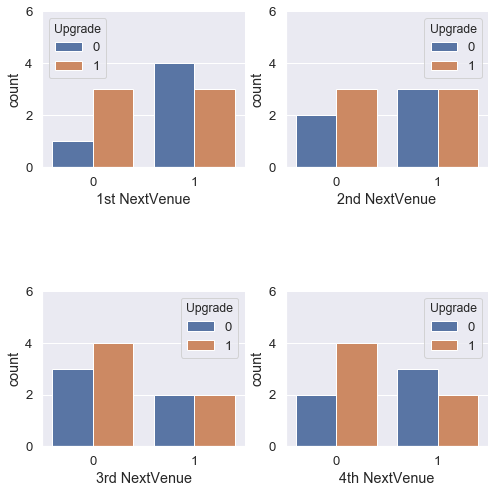

In [177]:
sns.set(font_scale=1.2)
fig,axs=plt.subplots(2,2,figsize=(8, 8))
plt.subplots_adjust(hspace = 0.8)
c1=sns.countplot(x="1st NextVenue",data=training_set_ra,ax=axs[0,0],hue="Upgrade",palette="deep")
c1.set(ylim=(0,6))
c1.spines["top"].set_visible(False)
c1.spines["right"].set_visible(False)
c2=sns.countplot(x="2nd NextVenue",data=training_set_ra,ax=axs[0,1],hue="Upgrade",palette="deep")
c2.set(ylim=(0,6))
c2.spines["top"].set_visible(False)
c2.spines["right"].set_visible(False)
c3=sns.countplot(x="3rd NextVenue",data=training_set_ra,ax=axs[1,0],hue="Upgrade",palette="deep")
c3.set(ylim=(0,6))
c3.spines["top"].set_visible(False)
c3.spines["right"].set_visible(False)
c4=sns.countplot(x="4th NextVenue",data=training_set_ra,ax=axs[1,1],hue="Upgrade",palette="deep")
c4.set(ylim=(0,6))
c4.spines["top"].set_visible(False)
c4.spines["right"].set_visible(False)

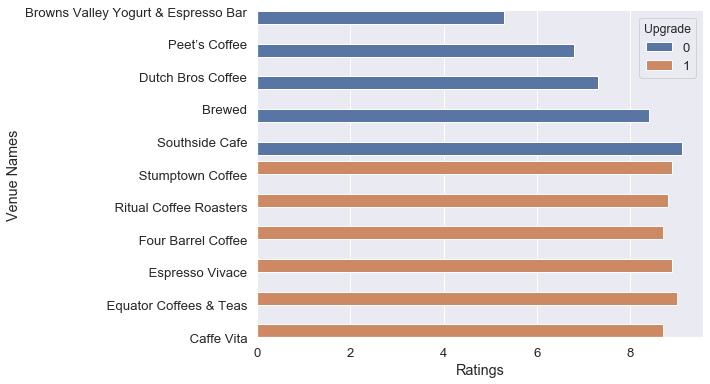

In [179]:
sns.set(font_scale=1.2)
fig,axs=plt.subplots(figsize=(8, 6))
s2=sns.barplot(x="Rating",y="Venue Name",data=training_set_ra,hue="Upgrade",ax=axs)
s2.set_xlabel("Ratings")
s2.set_ylabel("Venue Names")
s2.set(ylim=(0,10))
s2.spines["top"].set_visible(False)
s2.spines["right"].set_visible(False)


In [82]:
dir

<function dir>

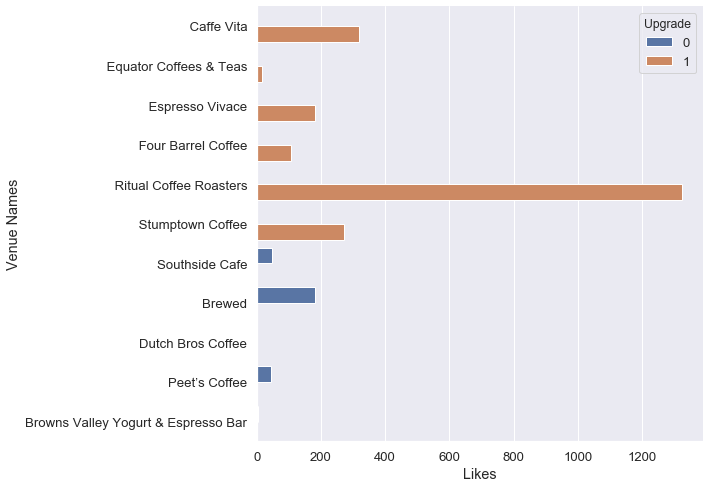

In [180]:
sns.set(font_scale=1.2)
fig,axs=plt.subplots(figsize=(8,8))
s1=sns.barplot(x="Likes",y="Venue Name",data=training_set_ra,hue="Upgrade",ax=axs)
s1.set_xlabel("Likes")
s1.set_ylabel("Venue Names")
s1.spines["top"].set_visible(False)
s1.spines["right"].set_visible(False)


[(0, 6)]

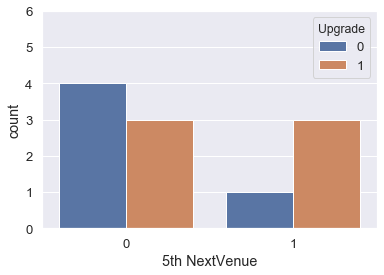

In [181]:
sns.set(font_scale=1.2)
c4=sns.countplot(x="5th NextVenue",data=training_set_ra,hue="Upgrade",palette="deep")
c4.set(ylim=(0,6))

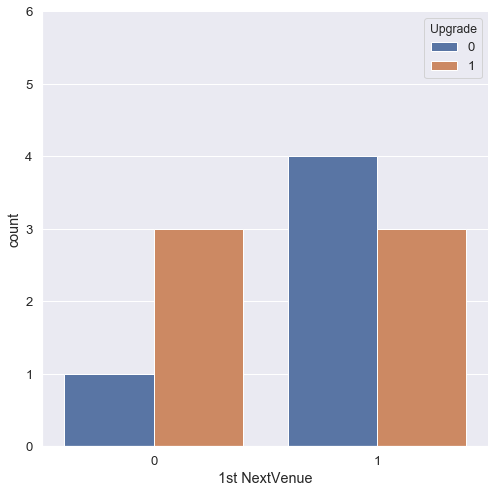

In [182]:
sns.set(font_scale=1.2)
fig,axs=plt.subplots(figsize=(8, 8))
c1=sns.countplot(x="1st NextVenue",data=training_set_ra,ax=axs,hue="Upgrade",palette="deep")
c1.set(ylim=(0,6))
c1.spines["top"].set_visible(False)
c1.spines["right"].set_visible(False)

<a id="section6"></a>
### 6. Correlation 

### &nbsp; Replacing categorical variables with dummy values

In [85]:
cols=[["1st NextVenue","2nd NextVenue","3rd NextVenue","4th NextVenue","5th NextVenue"]]

In [86]:

for i in range(0,len(training_set_ra)):
    if training_set_ra.iloc[i,7]=="Shopping Activity":
        training_set_ra.iloc[i,7]=1
    else:
        training_set_ra.iloc[i,7]=0
    if training_set_ra.iloc[i,8]=="Shopping Activity":
        training_set_ra.iloc[i,8]=1
    else:
        training_set_ra.iloc[i,8]=0    
    if training_set_ra.iloc[i,9]=="Shopping Activity":
        training_set_ra.iloc[i,9]=1
    else:
        training_set_ra.iloc[i,9]=0 
    if training_set_ra.iloc[i,10]=="Shopping Activity":
        training_set_ra.iloc[i,10]=1
    else:
        training_set_ra.iloc[i,10]=0 
    if training_set_ra.iloc[i,11]=="Shopping Activity":
        training_set_ra.iloc[i,11]=1
    else:
        training_set_ra.iloc[i,11]=0       

C:\Users\Toshiba\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:480: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [87]:
training_set_ra.head()

,Venue Name,Upgrade,Latitude,Longitude,Address,Venue ID,Likes,1st NextVenue,2nd NextVenue,3rd NextVenue,4th NextVenue,5th NextVenue,Rating
1,Caffe Vita,Yes,40.7198,-73.9884,"(Caffè Vita, 124, Ludlow Street, Lower East Si...",4f22b060e4b02a95fc886761,317,0,0,0,0,0,8.7
2,Equator Coffees & Teas,Yes,37.8121,-122.261,"(Equator Coffees & Teas, Bay Place, Financial ...",59f4a4825ba0466a8a09d7cb,16,1,1,1,1,1,9.0
3,Espresso Vivace,Yes,47.6216,-122.321,"(Espresso Vivace - Sidewalk Bar, 321, Broadway...",44e49b62f964a52061371fe3,183,1,1,0,0,1,8.9
4,Four Barrel Coffee,Yes,37.729,-122.404,"(Four Barrel Coffee, 2, Burrows Street, Portol...",5169af8d498e44df71319f6b,107,0,1,0,0,0,8.7
5,Ritual Coffee Roasters,Yes,37.7564,-122.421,"(Ritual Coffee Roasters, 1026, Valencia Street...",42853f80f964a5200c231fe3,1323,0,0,0,0,0,8.8


In [88]:
for i in range(0,len(training_set_ra)):
    if training_set_ra.iloc[i,1]=="Yes":
        training_set_ra.iloc[i,1]=1
    else:
        training_set_ra.iloc[i,1]=0

In [89]:

training_set_ra["Total Shops"]=training_set_ra["1st NextVenue"]+training_set_ra["2nd NextVenue"]+training_set_ra["3rd NextVenue"]+training_set_ra["4th NextVenue"]+training_set_ra["5th NextVenue"]
training_set_ra.head()

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Venue Name,Upgrade,Latitude,Longitude,Address,Venue ID,Likes,1st NextVenue,2nd NextVenue,3rd NextVenue,4th NextVenue,5th NextVenue,Rating,Total Shops
1,Caffe Vita,1,40.7198,-73.9884,"(Caffè Vita, 124, Ludlow Street, Lower East Si...",4f22b060e4b02a95fc886761,317,0,0,0,0,0,8.7,0
2,Equator Coffees & Teas,1,37.8121,-122.261,"(Equator Coffees & Teas, Bay Place, Financial ...",59f4a4825ba0466a8a09d7cb,16,1,1,1,1,1,9.0,5
3,Espresso Vivace,1,47.6216,-122.321,"(Espresso Vivace - Sidewalk Bar, 321, Broadway...",44e49b62f964a52061371fe3,183,1,1,0,0,1,8.9,3
4,Four Barrel Coffee,1,37.729,-122.404,"(Four Barrel Coffee, 2, Burrows Street, Portol...",5169af8d498e44df71319f6b,107,0,1,0,0,0,8.7,1
5,Ritual Coffee Roasters,1,37.7564,-122.421,"(Ritual Coffee Roasters, 1026, Valencia Street...",42853f80f964a5200c231fe3,1323,0,0,0,0,0,8.8,0


In [90]:
training_set_ra.corr()

,Upgrade,Likes,1st NextVenue,2nd NextVenue,3rd NextVenue,4th NextVenue,5th NextVenue,Rating,Total Shops
Upgrade,1.000000,0.432145,-0.310530,-0.100000,-0.069007,-0.266667,0.310530,0.630258,-0.118378
Likes,0.432145,1.000000,-0.462031,-0.507877,-0.321395,-0.334258,-0.227383,0.308973,-0.496823
1st NextVenue,-0.310530,-0.462031,1.000000,0.069007,0.571429,0.690066,0.571429,-0.050874,0.772897
2nd NextVenue,-0.100000,-0.507877,0.069007,1.000000,0.310530,0.100000,0.310530,-0.482812,0.482617
3rd NextVenue,-0.069007,-0.321395,0.571429,0.310530,1.000000,0.828079,0.607143,-0.360604,0.886004
4th NextVenue,-0.266667,-0.334258,0.690066,0.100000,0.828079,1.000000,0.448543,-0.312238,0.819538
5th NextVenue,0.310530,-0.227383,0.571429,0.310530,0.607143,0.448543,1.000000,0.231924,0.782323
Rating,0.630258,0.308973,-0.050874,-0.482812,-0.360604,-0.312238,0.231924,1.000000,-0.264578
Total Shops,-0.118378,-0.496823,0.772897,0.482617,0.886004,0.819538,0.782323,-0.264578,1.000000


### &nbsp; Plotting a Heatmap to visualize correlation

(9.0, 1.0)

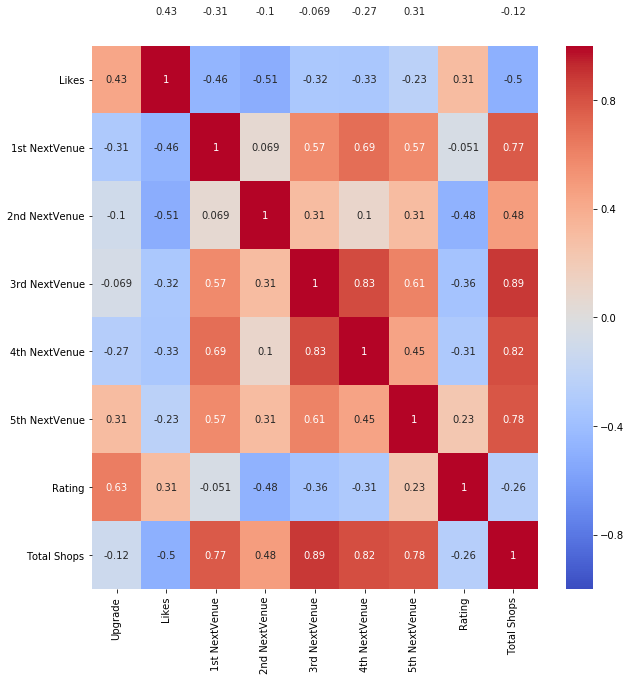

In [91]:
fig,ax=plt.subplots(figsize=(10,10))
heat=sns.heatmap(training_set_ra.corr(),vmin=-1,vmax=1,annot=True,ax=ax,cmap="coolwarm")
plt.yticks(rotation=0)
bottom,top=heat.get_ylim()
heat.set_ylim(bottom+0.5,top+0.5)

### &nbsp; Correlation Statistics

In [92]:
from scipy import stats

- Measure the strength of correlation between two features.
  * Correlation Coefficient
  * P-value
- Correlation Coefficient
  * Close to +1 : Positive Relationship
  * Close to -1 : Negative Relationship
  * Close to 0: No Relationship
- P-value
  * P-value<0.001 Strong certainty in the result
  * P-value<0.05  Moderate certainty in the result
  * P-value<0.1   Weak certainty in the result
  * P-value>0.1   No certainty in the result

### &emsp; To check relation between Venue's Likes and Upgrade column

In [93]:
pearsoncoef_,pearsonr=stats.pearsonr(training_set_ra["Likes"],training_set_ra["Upgrade"])
print("p-value:",pearsonr,"\nCorrelation coefficient:",pearsoncoef_)

p-value: 0.18439170980599812 
Correlation coefficient: 0.43214490612147205


&emsp; There is a positive relationship and significant correlation between them 

### &emsp; To check relation between Venue's Rating and Upgrade

In [94]:
pearsoncoef_,pearsonr=stats.pearsonr(training_set_ra["Rating"],training_set_ra["Upgrade"])
print("p-value:",pearsonr,"\nCorrelation coefficient:",pearsoncoef_)

p-value: 0.03765052553992512 
Correlation coefficient: 0.6302578903579142


&emsp; They have a positive relationship and are correlated to each other 

### &emsp; To check relation between Total shops visited after Venue  and Upgrade

In [95]:
pearsoncoef_,pearsonr=stats.pearsonr(training_set_ra["Total Shops"],training_set_ra["Upgrade"])
print("p-value:",pearsonr,"\nCorrelation coefficient:",pearsoncoef_)

p-value: 0.7288507890365485 
Correlation coefficient: -0.11837764568676647


&emsp; There is no relationship and correlation between them 

### &emsp; To check relation between most visited place after Venue  and Upgrade

In [96]:
pearsoncoef_,pearsonr=stats.pearsonr(training_set_ra["1st NextVenue"],training_set_ra["Upgrade"])
print("p-value:",pearsonr,"\nCorrelation coefficient:",pearsoncoef_)

p-value: 0.35267567281219087 
Correlation coefficient: -0.3105295017040594


&emsp; They have a negative relationship between them and are moderately correlated to each other 

### &emsp; To check relation between 2nd most visited place after Venue and Upgrade

In [97]:
pearsoncoef_,pearsonr=stats.pearsonr(training_set_ra["2nd NextVenue"],training_set_ra["Upgrade"])
print("p-value:",pearsonr,"\nCorrelation coefficient:",pearsoncoef_)

p-value: 0.7698749998921364 
Correlation coefficient: -0.10000000000000003


&emsp; They have no relationship or correlation between them 

### &emsp; To check relation between 3rd most visited place after Venue and Upgrade

In [98]:
pearsoncoef_,pearsonr=stats.pearsonr(training_set_ra["3rd NextVenue"],training_set_ra["Upgrade"])
print("p-value:",pearsonr,"\nCorrelation coefficient:",pearsoncoef_)

p-value: 0.8402276669135292 
Correlation coefficient: -0.06900655593423544


&emsp; They have no relationship or correlation between them 

### &emsp; To check relation between 4th most visited place after Venue and Upgrade

In [99]:
pearsoncoef_,pearsonr=stats.pearsonr(training_set_ra["4th NextVenue"],training_set_ra["Upgrade"])
print("p-value:",pearsonr,"\nCorrelation coefficient:",pearsoncoef_)

p-value: 0.4279743738223979 
Correlation coefficient: -0.2666666666666666


&emsp; They have a negative relationship between them and are moderately correlated to each other 

### &emsp; To check relation between 5th most visited place after Venue and Upgrade

In [100]:
pearsoncoef_,pearsonr=stats.pearsonr(training_set_ra["5th NextVenue"],training_set_ra["Upgrade"])
print("p-value:",pearsonr,"\nCorrelation coefficient:",pearsoncoef_)

p-value: 0.35267567281219087 
Correlation coefficient: 0.3105295017040594


&emsp; They have a positive relationship and are correlated to each other 

<a id="section7"></a>
### 7. Model Development

Based on above statistics,following independent variables are to be taken into consideration for predicting dependent variable "Upgrade".
 * Likes
 * Rating
 * 1st NextVenue
 * 5th NextVenue

### &nbsp; Normalization Training Data

In [101]:
fcls=["Likes","Rating","1st NextVenue","5th NextVenue"]
X=training_set_ra[fcls]


In [102]:
X.head()

,Likes,Rating,1st NextVenue,5th NextVenue
1,317,8.7,0,0
2,16,9.0,1,1
3,183,8.9,1,1
4,107,8.7,0,0
5,1323,8.8,0,0


In [103]:
from sklearn import preprocessing
xtrain= preprocessing.StandardScaler().fit(X).transform(X.astype(float))
xtrain[0:5]

D:\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


array([[ 0.24847878,  0.45921961, -1.32287566, -0.75592895],
       [-0.58338497,  0.72049973,  0.75592895,  1.32287566],
       [-0.12185259,  0.63340636,  0.75592895,  1.32287566],
       [-0.33189128,  0.45921961, -1.32287566, -0.75592895],
       [ 3.02872775,  0.54631298, -1.32287566, -0.75592895]])

In [104]:
ytrain=training_set_ra[["Upgrade"]]
ytrain.head()

,Upgrade
1,1
2,1
3,1
4,1
5,1


In [105]:
ytest=training_set_ra[["Upgrade"]][0:2].append(training_set_ra[["Upgrade"]][9:11])
ytest

,Upgrade
1,1
2,1
12,0
13,0


### &nbsp; Normalization Test Data

In [106]:
fcls=["Likes","Rating","1st NextVenue","5th NextVenue"]
xtest=training_set_ra[fcls][0:2].append(training_set_ra[fcls][9:11])
xtest= preprocessing.StandardScaler().fit(xtest).transform(xtest.astype(float))

D:\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


### &nbsp; Decision Tree

In [107]:
from sklearn.tree import DecisionTreeClassifier
los=DecisionTreeClassifier(criterion="entropy",max_depth=8)

In [108]:
los.fit(xtrain,ytrain)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### &nbsp; K Nearest Neighbor(KNN)

In [109]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
nei=KNeighborsClassifier(n_neighbors=2).fit(xtrain,ytrain)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


### &nbsp; Support Vector Machine

In [110]:
from sklearn import svm
slos=svm.SVC(kernel="rbf")
slos.fit(xtrain,ytrain)

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

### &nbsp; Logistic Regression

In [111]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.001, solver='liblinear')
LR.fit(xtrain,ytrain)

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

<a id="section8"></a>
### 8. Result

First,let's make a test dataset of coffee shops around my house in Bengaluru

In [112]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&query={}'.format(CLIENT_ID,CLIENT_SECRET,VERSION,12.8997,77.4827,5000,"coffee")
resp = requests.get(url=url)
data = json.loads(resp.text)

In [113]:
data["response"]["venues"]

venue = data['response']['venues']
ven_id=json_normalize(venue)
ven_id.head()

,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,location.crossStreet
0,522c2a6211d23a04fdf46cc2,cafe coffee day - MBM Square,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",v-1580501366,False,near jss academy of technical edu.,12.904406,77.505599,"[{'label': 'display', 'lat': 12.90440582992103...",2539,566060,IN,Bangalore,karnatka,India,"[near jss academy of technical edu., Bangalore...",NaN
1,588cac54dc332914bc55572a,Brahmin's Coffee Katte,"[{'id': '54135bf5e4b08f3d2429dfde', 'name': 'S...",v-1580501366,False,NaN,12.904904,77.528420,"[{'label': 'display', 'lat': 12.904904, 'lng':...",4994,560098,IN,Bangalore,Karnātaka,India,"[Bangalore 560098, Karnātaka, India]",NaN
2,581b06995cc1d740fe34958f,BGS coffee shop,"[{'id': '4bf58dd8d48988d143941735', 'name': 'B...",v-1580501366,False,NaN,12.902942,77.496804,"[{'label': 'display', 'lat': 12.902942, 'lng':...",1572,NaN,IN,NaN,NaN,India,[India],NaN
3,4c8f01eead70a143ce748e0f,Coffee Day Global Village,"[{'id': '4bf58dd8d48988d16d941735', 'name': 'C...",v-1580501366,False,NaN,12.922747,77.506413,"[{'label': 'display', 'lat': 12.92274685502277...",3633,NaN,IN,NaN,NaN,India,[India],NaN
4,4cb6d98364998cfa544c18a2,Cafe Coffee Day,"[{'id': '4bf58dd8d48988d1e1931735', 'name': 'A...",v-1580501366,False,global village,12.917689,77.500550,"[{'label': 'display', 'lat': 12.91768906666666...",2785,NaN,IN,Bangalore,Karnātaka,India,"[global village (rvce post, mysore road), Bang...","rvce post, mysore road"


In [114]:
ven_id.shape

(19, 17)

In [115]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [116]:
# filter columns
filtered_columns = ['name','id','categories','location.lat', 'location.lng']
test=ven_id.loc[:, filtered_columns]

# filter the category for each row
test['categories'] = test.apply(get_category_type, axis=1)

# clean columns
test.columns = [col.split(".")[-1] for col in test.columns]

test.head()

,name,id,categories,lat,lng
0,cafe coffee day - MBM Square,522c2a6211d23a04fdf46cc2,Coffee Shop,12.904406,77.505599
1,Brahmin's Coffee Katte,588cac54dc332914bc55572a,South Indian Restaurant,12.904904,77.528420
2,BGS coffee shop,581b06995cc1d740fe34958f,Breakfast Spot,12.902942,77.496804
3,Coffee Day Global Village,4c8f01eead70a143ce748e0f,Café,12.922747,77.506413
4,Cafe Coffee Day,4cb6d98364998cfa544c18a2,Arcade,12.917689,77.500550


In [117]:
test=test[test["categories"]=="Coffee Shop" ]

In [118]:
test

,name,id,categories,lat,lng
0,cafe coffee day - MBM Square,522c2a6211d23a04fdf46cc2,Coffee Shop,12.904406,77.505599
12,Malecoor Coffee Mane,5d1ec29ab55cb80023f99653,Coffee Shop,12.906834,77.520920
13,Katte Coffee,5102155ce4b0d01b48708477,Coffee Shop,12.921857,77.520886
14,Cafe Coffee Day,4cea6cc19f776ea8b7b06822,Coffee Shop,12.928837,77.518455


In [119]:
test=test.rename(columns={"name":"Venue Name","id":"Venue ID","lat":"Latitude","lng":"Longitude"})

In [120]:
def get_likes(table):
    likes=[]
    for i in range(0,len(table)):
        url1= 'https://api.foursquare.com/v2/venues/{}/likes?client_id={}&client_secret={}&v={}'.format(table.iloc[i,1],CLIENT_ID,CLIENT_SECRET,VERSION)
        resp1 = requests.get(url=url1)
        data1= json.loads(resp1.text)  
        venues1 = data1["response"]["likes"]["count"]
        likes.append(venues1)
    ltable=pd.DataFrame(data={"Likes":likes})      
    table=table.join(ltable)
    return(table)      

In [121]:
test=test[["Venue Name","Venue ID","Latitude","Longitude"]]
test=test.reset_index(drop=True)

In [122]:
test=get_likes(test)

In [123]:
test

,Venue Name,Venue ID,Latitude,Longitude,Likes
0,cafe coffee day - MBM Square,522c2a6211d23a04fdf46cc2,12.904406,77.505599,3
1,Malecoor Coffee Mane,5d1ec29ab55cb80023f99653,12.906834,77.520920,0
2,Katte Coffee,5102155ce4b0d01b48708477,12.921857,77.520886,2
3,Cafe Coffee Day,4cea6cc19f776ea8b7b06822,12.928837,77.518455,2


In [124]:
def top_5(table):
    t1=[]
    t2=[]
    t3=[]
    t4=[]
    t5=[]
    t=[t1,t2,t3,t4,t5]
    for i in range(0,len(table)):
        url1= 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&time={}&day={}&intent={}&lastVenue={}&sortByPopularity={}'.format(CLIENT_ID,CLIENT_SECRET,VERSION,
        table.iloc[i,2],table.iloc[i,3],2500,5,"any","any","nextVenues",table.iloc[i,1],1)
        resp1 = requests.get(url=url1)
        data1= json.loads(resp1.text)
        data1
        for r in range(0,5):
                ven=data1["response"]["groups"][0]["items"][r]["venue"]["categories"][0]["name"]
                t[r].append(ven)
    t5=pd.DataFrame(data={"1st NextVenue":t[0],"2nd NextVenue":t[1],"3rd NextVenue":t[2],"4th NextVenue":t[3],"5th NextVenue":t[4]})           
    table=table.join(t5)
    return(table)

In [125]:
test=top_5(test)

In [126]:
test

,Venue Name,Venue ID,Latitude,Longitude,Likes,1st NextVenue,2nd NextVenue,3rd NextVenue,4th NextVenue,5th NextVenue
0,cafe coffee day - MBM Square,522c2a6211d23a04fdf46cc2,12.904406,77.505599,3,Indian Restaurant,Lake,Café,Food Court,Bakery
1,Malecoor Coffee Mane,5d1ec29ab55cb80023f99653,12.906834,77.520920,0,Indian Restaurant,Lake,Café,Food Court,Multiplex
2,Katte Coffee,5102155ce4b0d01b48708477,12.921857,77.520886,2,Pizza Place,Indian Restaurant,Café,Multiplex,Park
3,Cafe Coffee Day,4cea6cc19f776ea8b7b06822,12.928837,77.518455,2,Café,Multiplex,Indian Restaurant,Bakery,Fried Chicken Joint


In [127]:
ratings=[]
for i in range(0,len(test)):
    try:
        ratings.append(get_rating(test.iloc[i,1]))
    except:
        ratings.append("NaN")
rtable=pd.DataFrame(data={"Rating":ratings})
test=test.join(rtable)
test.head()        

,Venue Name,Venue ID,Latitude,Longitude,Likes,1st NextVenue,2nd NextVenue,3rd NextVenue,4th NextVenue,5th NextVenue,Rating
0,cafe coffee day - MBM Square,522c2a6211d23a04fdf46cc2,12.904406,77.505599,3,Indian Restaurant,Lake,Café,Food Court,Bakery,NaN
1,Malecoor Coffee Mane,5d1ec29ab55cb80023f99653,12.906834,77.520920,0,Indian Restaurant,Lake,Café,Food Court,Multiplex,NaN
2,Katte Coffee,5102155ce4b0d01b48708477,12.921857,77.520886,2,Pizza Place,Indian Restaurant,Café,Multiplex,Park,NaN
3,Cafe Coffee Day,4cea6cc19f776ea8b7b06822,12.928837,77.518455,2,Café,Multiplex,Indian Restaurant,Bakery,Fried Chicken Joint,5.8


In [128]:
for i in range(0,len(test)):
    if test.iloc[i,5].endswith("laza") is True:
        test.iloc[i,5]="Shopping Activity"
    elif test.iloc[i,5].endswith("arket") is True:
        test.iloc[i,5]="Shopping Activity"
    elif test.iloc[i,5].endswith("tore") is True:
        test.iloc[i,5]="Shopping Activity" 
    elif test.iloc[i,5].endswith("Mall") is True:
        test.iloc[i,5]="Shopping Activity"
    elif test.iloc[i,5].endswith("Shop") is True:
        test.iloc[i,5]="Shopping Activity"   
    else:
        test.iloc[i,5]="Non-Shopping Activity"

In [129]:
for i in range(0,len(test)):
    if test.iloc[i,6].endswith("laza") is True:
        test.iloc[i,6]="Shopping Activity"
    elif test.iloc[i,6].endswith("arket") is True:
        test.iloc[i,6]="Shopping Activity"
    elif test.iloc[i,6].endswith("tore") is True:
        test.iloc[i,6]="Shopping Activity" 
    elif test.iloc[i,6].endswith("Mall") is True:
        test.iloc[i,6]="Shopping Activity"
    elif test.iloc[i,6].endswith("Shop") is True:
        test.iloc[i,6]="Shopping Activity"   
    else:
        test.iloc[i,6]="Non-Shopping Activity"

In [130]:
for i in range(0,len(test)):
    if test.iloc[i,7].endswith("laza") is True:
        test.iloc[i,7]="Shopping Activity"
    elif test.iloc[i,7].endswith("arket") is True:
        test.iloc[i,7]="Shopping Activity"
    elif test.iloc[i,7].endswith("tore") is True:
        test.iloc[i,7]="Shopping Activity" 
    elif test.iloc[i,7].endswith("Mall") is True:
        test.iloc[i,7]="Shopping Activity"
    elif test.iloc[i,7].endswith("Shop") is True:
        test.iloc[i,7]="Shopping Activity"   
    else:
        test.iloc[i,7]="Non-Shopping Activity"

In [131]:
for i in range(0,len(test)):
    if test.iloc[i,8].endswith("laza") is True:
        test.iloc[i,8]="Shopping Activity"
    elif test.iloc[i,8].endswith("arket") is True:
        test.iloc[i,8]="Shopping Activity"
    elif test.iloc[i,8].endswith("tore") is True:
        test.iloc[i,8]="Shopping Activity" 
    elif test.iloc[i,8].endswith("Mall") is True:
        test.iloc[i,8]="Shopping Activity"
    elif test.iloc[i,8].endswith("Shop") is True:
        test.iloc[i,8]="Shopping Activity"   
    else:
        test.iloc[i,8]="Non-Shopping Activity"

In [132]:
for i in range(0,len(test)):
    if test.iloc[i,9].endswith("laza") is True:
        test.iloc[i,9]="Shopping Activity"
    elif test.iloc[i,9].endswith("arket") is True:
        test.iloc[i,9]="Shopping Activity"
    elif test.iloc[i,9].endswith("tore") is True:
        test.iloc[i,9]="Shopping Activity" 
    elif test.iloc[i,9].endswith("Mall") is True:
        test.iloc[i,9]="Shopping Activity"
    elif test.iloc[i,9].endswith("Shop") is True:
        test.iloc[i,9]="Shopping Activity"   
    else:
        test.iloc[i,9]="Non-Shopping Activity"

In [133]:
test

,Venue Name,Venue ID,Latitude,Longitude,Likes,1st NextVenue,2nd NextVenue,3rd NextVenue,4th NextVenue,5th NextVenue,Rating
0,cafe coffee day - MBM Square,522c2a6211d23a04fdf46cc2,12.904406,77.505599,3,Non-Shopping Activity,Non-Shopping Activity,Non-Shopping Activity,Non-Shopping Activity,Non-Shopping Activity,NaN
1,Malecoor Coffee Mane,5d1ec29ab55cb80023f99653,12.906834,77.520920,0,Non-Shopping Activity,Non-Shopping Activity,Non-Shopping Activity,Non-Shopping Activity,Non-Shopping Activity,NaN
2,Katte Coffee,5102155ce4b0d01b48708477,12.921857,77.520886,2,Non-Shopping Activity,Non-Shopping Activity,Non-Shopping Activity,Non-Shopping Activity,Non-Shopping Activity,NaN
3,Cafe Coffee Day,4cea6cc19f776ea8b7b06822,12.928837,77.518455,2,Non-Shopping Activity,Non-Shopping Activity,Non-Shopping Activity,Non-Shopping Activity,Non-Shopping Activity,5.8


In [134]:
for i in range(0,len(test)):
    if test.iloc[i,5]=="Shopping Activity":
        test.iloc[i,5]=1
    else:
        test.iloc[i,5]=0
    if test.iloc[i,6]=="Shopping Activity":
        test.iloc[i,6]=1
    else:
        test.iloc[i,6]=0    
    if test.iloc[i,7]=="Shopping Activity":
        test.iloc[i,7]=1
    else:
        test.iloc[i,7]=0 
    if test.iloc[i,8]=="Shopping Activity":
        test.iloc[i,8]=1
    else:
        test.iloc[i,8]=0 
    if test.iloc[i,9]=="Shopping Activity":
        test.iloc[i,9]=1
    else:
        test.iloc[i,9]=0       

In [135]:
test

,Venue Name,Venue ID,Latitude,Longitude,Likes,1st NextVenue,2nd NextVenue,3rd NextVenue,4th NextVenue,5th NextVenue,Rating
0,cafe coffee day - MBM Square,522c2a6211d23a04fdf46cc2,12.904406,77.505599,3,0,0,0,0,0,NaN
1,Malecoor Coffee Mane,5d1ec29ab55cb80023f99653,12.906834,77.520920,0,0,0,0,0,0,NaN
2,Katte Coffee,5102155ce4b0d01b48708477,12.921857,77.520886,2,0,0,0,0,0,NaN
3,Cafe Coffee Day,4cea6cc19f776ea8b7b06822,12.928837,77.518455,2,0,0,0,0,0,5.8


In [136]:
test.dtypes

Venue Name        object
Venue ID          object
Latitude         float64
Longitude        float64
Likes              int64
1st NextVenue      int64
2nd NextVenue      int64
3rd NextVenue      int64
4th NextVenue      int64
5th NextVenue      int64
Rating            object
dtype: object

In [137]:
test.loc[0,"Rating"]=5.8
test.loc[1,"Rating"]=9.0
test.loc[2,"Rating"]=9.4

In [138]:
test.dtypes

Venue Name        object
Venue ID          object
Latitude         float64
Longitude        float64
Likes              int64
1st NextVenue      int64
2nd NextVenue      int64
3rd NextVenue      int64
4th NextVenue      int64
5th NextVenue      int64
Rating            object
dtype: object

In [139]:
test['Rating'] = test['Rating'].astype(float)

In [140]:
fcls=["Likes","Rating","1st NextVenue","5th NextVenue"]
test=test[fcls]

In [141]:
ytest=pd.DataFrame(data={"Upgrade":[0,0,0,0]})
ytest

,Upgrade
0,0
1,0
2,0
3,0


In [142]:
test

,Likes,Rating,1st NextVenue,5th NextVenue
0,3,5.8,0,0
1,0,9.0,0,0
2,2,9.4,0,0
3,2,5.8,0,0


In [143]:
test= preprocessing.StandardScaler().fit(test).transform(test.astype(float))

D:\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


### &nbsp; K Nearest Neighbor(KNN)

In [144]:
nei.predict(test)

array([0, 0, 0, 0], dtype=int64)

### &nbsp; Decision Tree

In [145]:
los.predict(test)

array([0, 0, 0, 0], dtype=int64)

### &nbsp; Support Vector Machine

In [146]:
slos.predict(test)

array([0, 1, 1, 0], dtype=int64)

### &nbsp; Logistic Regression

In [147]:
LR.predict(test)

array([0, 0, 1, 0], dtype=int64)

### Model Evaluation

In [148]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [149]:
k1=nei.predict(test)
k2=los.predict(test)
k3=slos.predict(test)
k4=LR.predict(test)
j1=jaccard_similarity_score(k1,ytest)
j2=jaccard_similarity_score(k2,ytest)
j3=jaccard_similarity_score(k3,ytest)
j4=jaccard_similarity_score(k4,ytest)
f1=f1_score(k1,ytest,average="weighted")
f2=f1_score(k2,ytest,average="weighted")
f3=f1_score(k3,ytest,average="weighted")
f4=f1_score(k4,ytest,average="weighted")
k41=LR.predict_proba(test)
l1=log_loss(ytest,k41,labels=(0,1))
jac=[j1,j2,j3,j4]
f1=[f1,f2,f3,f4]
algo=["KNN","Decision Tree","SVM","LogisticRegression"]

D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [150]:
mod_eva=pd.DataFrame(data={"Algorithm":algo,"Jaccard":jac,"F1-score":f1,"LogLoss":["NaN","NaN","NaN",l1]})

In [151]:
mod_eva

,Algorithm,Jaccard,F1-score,LogLoss
0,KNN,1.00,1.000000,NaN
1,Decision Tree,1.00,1.000000,NaN
2,SVM,0.50,0.333333,NaN
3,LogisticRegression,0.75,0.642857,0.693397


From above table we can conclude that Decision Tree is the best algorithm to predict as it not only has the most accuracy but also can return similar numbers when large testsets are given unlike KNN, which wouldn't be able to do if the instances aren't similar to each other.